In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

In [2]:
import random, time

np.random.seed(1001)
random.seed(1001)

# Problem description
section 4.4 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [3]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution

In [4]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 100
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, print_freq=10)

k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453, L0=4.133904243507362e-18
k=10, rel_gap=1.1069432061375846, L=484.283154448177, U=1020.3571021114651, L0=484.283154448177
k=20, rel_gap=0.22913803276888248, L=770.9308691096707, U=947.5804518582654, L0=770.9308691096707
rho=1.2981583075836347
k=30, rel_gap=0.0697514081144782, L=873.4087341320475, U=934.3302231972417, L0=873.4087341320475
k=40, rel_gap=0.02360610325628419, L=895.7722549782077, U=916.9179473233378, L0=895.7722549782077
k=50, rel_gap=0.012237769849144875, L=903.7395170453636, U=914.7992732585421, L0=903.7395170453636
k=60, rel_gap=0.005893273925458703, L=907.9517455438954, U=913.302553891484, L0=907.9517455438954
k=70, rel_gap=0.002478565317667285, L=910.3542728655264, U=912.6106453930411, L0=910.3542728655264
k=80, rel_gap=0.001161397392622111, L=911.2061380270771, U=912.264410459923, L0=911.2061380270771
k=90, rel_gap=0.0006337291780594279, L=911.5653666045982, U=912.143052175124, L0=911.5

# Centralized solution

In [6]:
x_cvx, prob_cvx, h_cvx = ob.cvx_federated_learning(params=params)

In [7]:
h_cvx, prob.upper_bnd[-1]

(911.9977383003338, 912.0594794037786)

# Plot

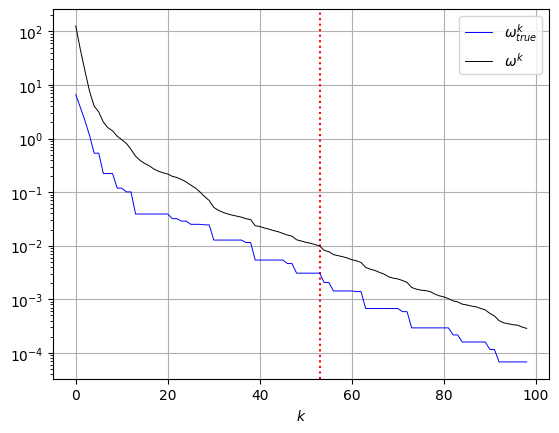

In [8]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx, file_name='fl_osbdo.pdf')

i=39, omega_k=0.02360610325628419, omega_true=0.00539497941318761
i=53, omega_k=0.009885184079475027, omega_true=0.003071866124832139
